In [2]:
import numpy as np
from path import Path
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import os
import sys
import copy
sys.path.append('../')
import random
from tool.data_io import get_data_paths,read_image, read_json, save_image, try_create_dir,save_json
from tool.yaml_io import write_to_yaml,read_from_yaml
from tool.plt_utils import plt_samples


In [3]:
def set_labels(label_file):
    labels = read_json(label_file)
    label_ids = set()
    label_names = set()
    for species in labels.keys():
        for (idx, item) in labels[species].items():
            label_ids.add(item['number'])
            label_names.add(item['label'])
    return labels

def transform_label(label, labels_map, species ='quercus-bicolor-herbivory' ):
    for key, value in labels_map[species].items():
        label[label == int(key)] = value['number']
    return label

In [3]:
d_type='skel'
labels_map = set_labels(f'../../stats/label_{d_type}.json' )# ../../stats/label_file_common_binary.json' ../../stats/label_skel.json

In [4]:
species = 'quercus-bicolor-herbivory'
realease_version = '1.0' # '3.0-qb-corrected-test-val' #'1.0' #
path_mask = f'releases/{realease_version}/other_formats/semantic_mask/masks'
root = Path(f"/usr/xtmp/xs75/leaves/datasets_updated/leaves/{species}")

dir_annotate = root/f'releases/{realease_version}/annotations'
dir_images = root/'images'
dir_label = root/path_mask

In [5]:
root_new = Path(f'/usr/xtmp/xs75/leaves/original_data/leaves/{species}')
dir_label_new = root_new/'releases/1.0/other_formats/semantic_mask/masks'
dir_images_new = root_new/'images'
partition = read_json(f'../../stats/partition_qb_{d_type}.json')  #'../../stats/partition_os_hole.json'

In [6]:
validation_ids = partition['validation']['images'].keys()
validation_ids = [it.split('/')[1] for it in validation_ids]
# map_photoid2rand = read_json("./qb_map_filenames.json")

  0%|          | 0/353 [00:00<?, ?it/s]

map 00000545.png to 706275.png
map 00000545.jpg to 706275.jpg


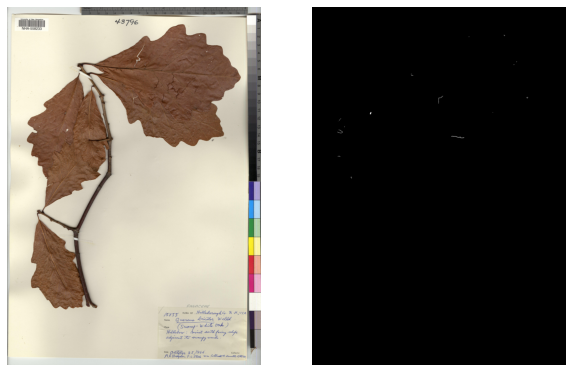

  0%|          | 0/353 [00:03<?, ?it/s]


In [7]:
import os
for path in tqdm(glob(dir_annotate/'*.json')):
    annotate_file = read_json(path)
    
    orig_id, suffix = annotate_file["image"]["original_filename"].split('.')
    rand_id, _ = annotate_file["image"]["filename"].split('.') 
    
    old_label_name = rand_id + '.png'
    old_file_name = rand_id + '.' +suffix
    new_label_name = orig_id + '.png'
    new_file_name = orig_id + '.' +suffix
    msg = f'map {old_label_name} to {new_label_name}\n'
    msg += f'map {old_file_name} to {new_file_name}'
    print(msg)    
#     img, img_platte = read_image(dir_images/old_file_name)
#     label, label_platte = read_image(dir_label/old_label_name)
    img, img_platte = read_image(dir_images/new_file_name)
    label, label_platte = read_image(dir_label/new_label_name)
    inputs_ = [img, label]
#     plt_samples(inputs_, n_c = 2, n_r = 1)
    break
#     save_image(dir_label/new_label_name, label, label_platte)
#     save_image(dir_images/new_file_name, img, img_platte)
#     label = transform_label(label, labels_map)
#     os.remove(dir_label/old_label_name)
#     os.remove(dir_images/old_file_name)


# Generate updated clean_info (new ids)

In [9]:
clean_info = read_json('/home/users/xs75/Xian/leaf-damage-new/leaves/stats/clean_info.json')

In [10]:
# # clean_info.keys()
# clean_info_with_new_ids = clean_info.copy()
# for img_id in tqdm(clean_info.keys()):
# #     img_id = 'quercus-bicolor-herbivory/00000717_2012647'
#     species, base_id = img_id.split('/')
#     new_base_id = base_id.split('_')[1]
#     new_img_id = os.path.join(species,new_base_id)
#     msg = f'map {img_id} to {new_img_id}'
#     clean_info_with_new_ids[new_img_id] = clean_info[img_id]
# save_json('/home/users/xs75/Xian/leaf-damage-new/leaves/stats/clean_info_new_ids.json', clean_info_with_new_ids)

## generate process_info with new ids

In [11]:
from preprocessing.data_to_clean import read_clean_info

In [17]:
new_gen = set()
dir_process_info = Path('/home/users/xs75/Xian/leaf-damage-new/leaves/stats/process_info')
dict_sp_count = dict()
for path in tqdm(glob(dir_process_info/'*/*.json')):
    process = read_json(path)
    species, p_id = path.split('/')[-2], path.split('/')[-1]
    if '_' not in p_id:
        continue
    if species not in dict_sp_count.keys():
        dict_sp_count[species] = 0
    else:
        dict_sp_count[species] +=  1
        

#     new_p_id = p_id.split('_')[-1]
#     process['img_id'] = os.path.join(species,new_p_id.split('.')[0])
#     new_path = os.path.join(dir_process_info, species, new_p_id)
#     new_gen.add(new_path)
#     save_json(new_path, process)

100%|██████████| 1690/1690 [00:00<00:00, 4442.31it/s]


In [14]:
config_file = '../../configs/data_to_clean.yml'
clean_info = read_clean_info(config_file)

In [15]:
'quercus-bicolor-herbivory/268096' in clean_info.keys()

False

In [22]:
species = Path('quercus-bicolor-herbivory')

In [26]:
'00000415_4287841' '00000447_4287975' '00000569_706298'


for  num in  ['4287841', '4287975', '706298']:
    if species/num in clean_info.keys():
        print(species/num)


quercus-bicolor-herbivory/4287841
quercus-bicolor-herbivory/4287975
quercus-bicolor-herbivory/706298


# test original and corrected samples

In [18]:
species = 'quercus-bicolor-herbivory'
realease_version = '1.0' # '3.0-qb-corrected-test-val' #'1.0' #
path_mask = f'releases/{realease_version}/other_formats/semantic_mask/masks_clean'
root = Path(f"/usr/xtmp/xs75/leaves/datasets_updated/leaves/{species}")

dir_annotate = root/f'releases/{realease_version}/annotations'
dir_images = root/'images'
dir_label = root/path_mask
d_type='skel'
labels_map = set_labels(f'../../stats/label_{d_type}.json' )# ../../stats/label_file_common_binary.json' ../../stats/label_skel.json

In [22]:
# n = 0
# for path in tqdm(glob(dir_label/'*.png')):
#     list_path = path.split('/')
#     list_path[-5] = '3.0-qb-corrected-test-val'
#     compare_path = '/'+ os.path.join(*list_path)
# #     img, img_platte = read_image(dir_images/old_file_name)
# #     label, label_platte = read_image(dir_label/old_label_name)
# #     img, img_platte = read_image(dir_images/new_file_name)
    
#     label1, label_platte1 = read_image(path)
#     label2, label_platte2 = read_image(compare_path)
#     label1 = transform_label(label1, labels_map)
#     label2 = transform_label(label2, labels_map)
#     inputs_ = [label1, label2]
#     plt_samples(inputs_, n_c = 2, n_r = 1)
#     if n > 50:
#         break
#     n += 1

In [15]:
list_path = path.split('/')

# partition 


In [61]:
partition_original = read_json('../../stats/partition.json')
partition = copy.deepcopy(partition_original)

In [62]:
for phase in partition_original.keys():
    for type_ in partition_original[phase].keys():
        if type_ == 'images':
            for img_id in partition_original[phase][type_].keys():
                new_id = (img_id).split('_')[-1]
                partition[phase][type_][new_id] = copy.deepcopy(partition_original[phase][type_][img_id])
                if '_' in img_id:
                    del  partition[phase][type_][img_id]
#                     print(f'{phase}: delete{img_id}')
                partition[phase][type_][new_id]['base name'] = new_id
        if type_ == 'tiles':
            for i in range(len(partition_original[phase][type_])):
                partition[phase][type_][i]['base name'] = partition[phase][type_][i]['base name'].split('_')[-1]


In [64]:
save_json('../../stats/updated/partition.json', partition)

# Compare images after correction

In [4]:
part1 = read_json('../../stats/updated/original_partition_qb_skel_1.0.json')
part3 = read_json('../../stats/updated/original_partition_qb_skel_3.0.json')

In [5]:
root = Path(f"/usr/xtmp/xs75/leaves/datasets_updated/leaves")
phase = 'testing'

In [36]:
pos1 = []
pos3 = []
neg1 = []
neg3 = []
for i in tqdm(part1[phase]['images'].keys()):
#     print(i)
    paths1 = part1[phase]['images'][i]
    paths3 = part3[phase]['images'][i]
    img1, img_platte1 = read_image(root/paths1['image'])
    img3, img_platte3 = read_image(root/paths3['image'])
    label1, label_platte1 = read_image(root/paths1['label'])
    label3, label_platte3 = read_image(root/paths3['label'])
    label1=transform_label(label1, labels_map)
    label3=transform_label(label3, labels_map)
    tot = label1.size
    pos1 += [np.count_nonzero(label1)]
    pos3 += [np.count_nonzero(label3)]
    neg1 += [ tot - pos1[-1]]
    neg3 += [ tot - pos3[-1]]
#     inputs_ = [img1, img3, label1, label3]
#     plt_samples(inputs_, n_c = 2, n_r = 2)

100%|██████████| 95/95 [00:47<00:00,  1.99it/s]


In [37]:
np.count_nonzero(label1)

30808

In [38]:
np.count_nonzero(label3)

24966

In [39]:
sum(neg1)/sum(pos1)

1147.4901230106268

In [41]:
sum(neg3)/sum(pos3)

1630.3769131699912

In [50]:
# new_part1 = copy.deepcopy(part1)
# new_part3 = copy.deepcopy(part3)

In [43]:
def partition_swap(new_part, s1 = 'training', s2 = 'testing'):
    new_part['tmp'] = copy.deepcopy(new_part[s1])
    new_part[s1] = copy.deepcopy(new_part[s2])
    new_part[s2] = copy.deepcopy(new_part['tmp'])
    del new_part['tmp']
    print(len(new_part[s1]['images']))
    print(len(new_part[s2]['images']))
    return new_part

In [67]:
# new_part1 = partition_swap(new_part1)
# new_part3 = partition_swap(new_part3)

# save_json( '../../stats/updated/updated_qb_skel_1.0.json', new_part1)
# save_json( '../../stats/updated/updated_qb_skel_3.0.json', new_part3)

In [66]:
# num1 = len(new_part1['training']['images'])
# num3 = len(new_part3['training']['images'])
# print(f'{num1}, {num3}')

95, 95


# Generate a new partition for training a model with corrected test and validation sets

In [36]:
type(part3['validation']['tiles'])

dict

In [37]:
# part3['tmp'] = copy.deepcopy(part3['validation'])
partition = read_json('../../stats/updated/original_partition_qb_skel_3.0.json')
part3 = copy.deepcopy(partition)
part3['tmp'] = copy.deepcopy(part3['training'])
training_set = copy.deepcopy(part3['validation'])
training_set['images'].update(copy.deepcopy(part3['testing']['images']))
training_set['tiles'].update(copy.deepcopy(part3['testing']['tiles']))
part3['training'] = training_set
part3['validation'] = copy.deepcopy(part3['tmp'])
del part3['testing']
del part3['tmp']
save_json('../../stats/updated/qb_skel_3.0_test_val_to_train.json', part3)

In [38]:
len_train_img = len(part3['training']['images'])
len_val_img = len(part3['validation']['images'])
len_train_t = len(part3['training']['tiles'])
len_val_t = len(part3['validation']['tiles'])
print(f'{len_train_img}, {len_val_img}, {len_train_t}, {len_val_t}')

121, 219, 7160, 13470
